In [1]:
#laster inn pakker til diverse brul
import json
import pandas as pd
import requests
from pyjstat import pyjstat
from matplotlib import pyplot as plt
import sympy as sp 
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
import seaborn as sns
from IPython.display import Image, display
from PIL import Image

#for å fjerne Settingwithcopywarning melding
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [2]:
x_lab = "x"
y_lab = "y"

#diverse funksjoner

#funksjon for å lage datasett
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

#generell akse til diverse bruk
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel(y_lab, loc='top')
                ax.set_xlabel(x_lab, loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

In [3]:
arbeidstimer_ssb_url = "https://data.ssb.no/api/v0/no/table/04544/"

arbeidstimer_ssb_query = {
  "query": [
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Yrkesstatus",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FaktiskArbeidstid"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

# Oppgave 1.1

I oppgave 1.1 skal man se på kjønnsforskjeller i valg av arbeidstimer for menn og kvinner i Norge. I oppgaven går man blant annet innom hvordan kjønnsrollene tradisjonelt sett har vært, samt hvordan denne har endret seg. Videre går man inn på hvordan foreldrepermisjoner påvirker mødres yrkesdeltakelse. Til slutt skal man se på hvorfor høy yrkesdeltakelse og høye barnetall er viktig for bærekraftigheten til den norske velferdsmodellen.

## Kjønnforskjeller i valg av arbeidstimer for menn og kvinner i Norge

Ser man tilbake til Norge på 1950 tallet var det et fåtall kvinner i arbeid utenfor hjemmet. Mannen var på jobb og forsørget familien. Kvinnen tok vare på barn og hjemmet. Siden den tid har det skjedd en endring. Substituert barneplass og foreldepermisjoner kom på plass, og flere og flere kvinner valgte å arbeide. Ser man på figuren nedenfor, ser man hvordan gjennomsnittlig antall arbeidstimer per uke  har utviklet seg siden 1996 for kvinner og menn.

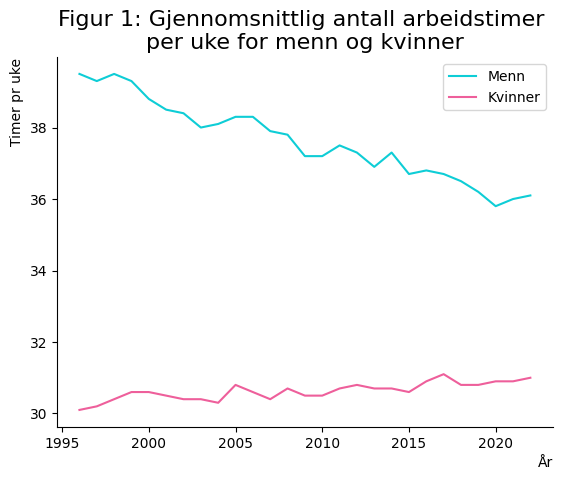

In [4]:
#Lager df
arbeidstimer, arbeidstimer_id, ds = apiToDataframe(arbeidstimer_ssb_url, arbeidstimer_ssb_query)

#modifiserer df
arbeidstimer["år"] = pd.to_numeric(arbeidstimer["år"])

#seperer kjønn til plot
arbeidstimer_menn=arbeidstimer[arbeidstimer["kjønn"]=="Menn"]
arbeidstimer_kvinner=arbeidstimer[arbeidstimer["kjønn"]=="Kvinner"]
x_lab = "År"
y_lab = "Timer pr uke"
#plot
fig=create_ax()
plt.plot(arbeidstimer_menn["år"], arbeidstimer_menn["value"],label="Menn", color="#0ecdd6") #menn plot
plt.plot(arbeidstimer_kvinner["år"], arbeidstimer_kvinner["value"], label="Kvinner", color="#ee5f9b") #kvinner plot
plt.title("""Figur 1: Gjennomsnittlig antall arbeidstimer 
per uke for menn og kvinner""", fontsize=16) #fig tittel
plt.legend() #legende
plt.show()#fjerner tekst fra generering av plot


Figuren ovenfor viser gjennomsnittlig antall timer jobbet per uke for menn og kvinner. Her kan man se at antall timer per uke har sunket fra ca. 39 timer per uke til i overkant av 36 timer for menn i perioden 1996 til 2022. I samme tidsrommet for kvinner, så har den gjennomsnittlige arbeidsuke økt fra i overkant av 30 timer, til nesten 32 timer per uke. 

Grunnen til at kvinner jobber mindre enn menn kan være at kvinner verdsetter fritid mer. Det kan være ulike grunner til dette, blant annet preferanser. Preferansene kan komme fra de "tradisjonelle" kjønnsrollene, hvor mannen i hovedsak var i arbeid og kvinnen tok vare på barn og hjem. 

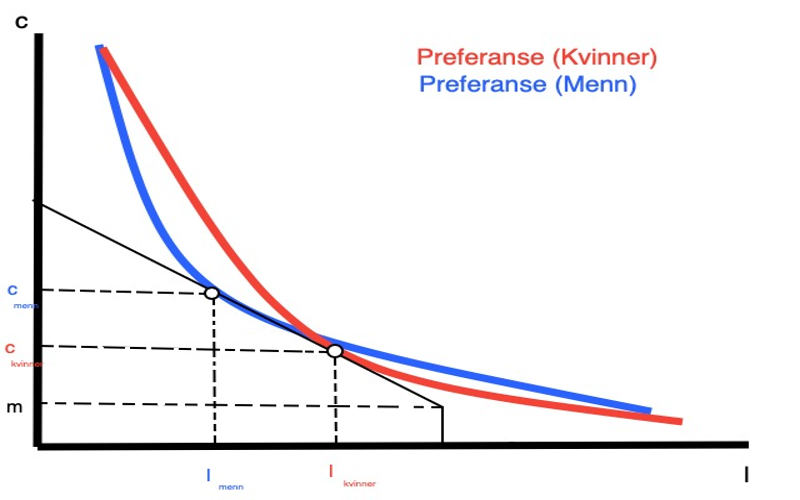

In [5]:
#bildes plassering
image_path2 = 'preferanser.jpg'

#åpner bilde
image2 = Image.open(image_path2)

new_size = (800, 500) #bildestrl

#lagrer resized bilde
resized_image2 = image2.resize(new_size)

#displayer bilde
display(resized_image2)

Figuren ovenfor viser hvordan preferansene mellom konsum og fritid kan se ut for menn og kvinner. På aksene er godene konsum og fritid.  Her er også budsjettlinjen også vist, som forklarer hvor mye konsum individene kan oppnå ved å velge å jobbe. Helningen på budsjettkurven er gitt av timenslønnen de oppnår. $m$ er den arbeidsfrie inntekten til individet, altså lønnen de ville mottatt uten å arbeide. Da begge oppnår høyere nytte (tilfredshet) ved å jobbe, velger begge individene dette.

Den blå kurven viser preferansen for menn og den rød for kvinner. Her kan man se ved samme lønn, ville mannen valgt å jobbe mer og kvinnen mindre, altså at mannen velger mindre fritid enn kvinnen. De oppnår tilsvarende tilfredshet utifra deres preferanser. Dette kan være en av årsakene til det man kan se utifra dataen hentet fra SSB.

## Sikrer permisjoner høy yrkesdeltakelse blant kvinner?

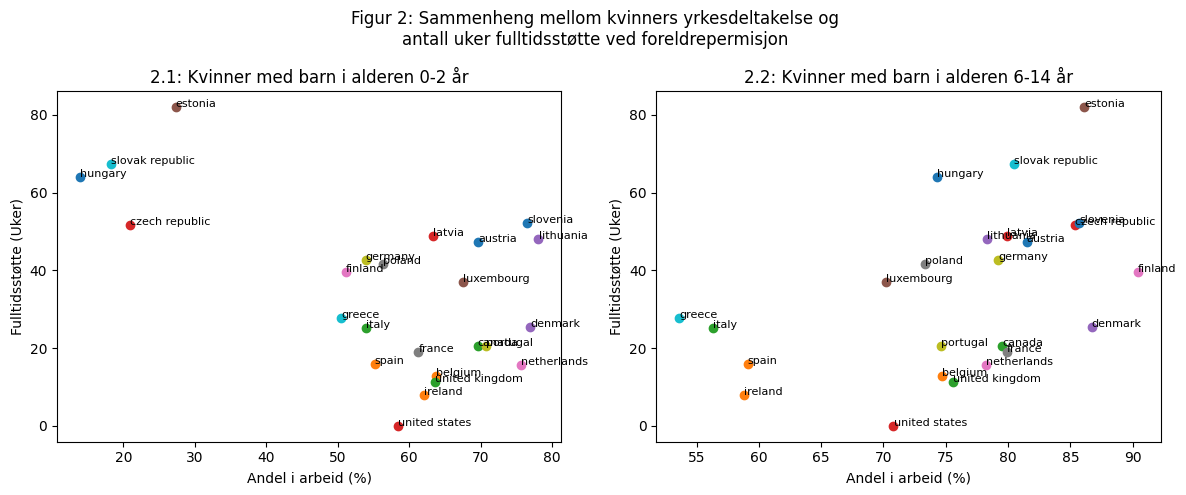

In [6]:
permisjoner = pd.read_csv("https://raw.githubusercontent.com/uit-sok-2008-h23/uit-sok-2008-h23.github.io/main/assets/women.csv", sep=";")

permisjoner

#figur med to subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#første plot
for i, row in permisjoner.iterrows():
    axs[0].scatter(row["fem_emp_rate_0_2"], row["tot_full_rate"], label=row["country"])
    axs[0].text(row["fem_emp_rate_0_2"] + 0.005, row["tot_full_rate"], row["country"].lower(), fontsize=8)

axs[0].set_xlabel("Andel i arbeid (%)")
axs[0].set_ylabel("Fulltidsstøtte (Uker)")
axs[0].set_title("2.1: Kvinner med barn i alderen 0-2 år")

#andre plot
for i, row in permisjoner.iterrows():
    axs[1].scatter(row["fem_emp_rate_6_14"], row["tot_full_rate"], label=row["country"])
    axs[1].text(row["fem_emp_rate_6_14"] + 0.005, row["tot_full_rate"], row["country"].lower(), fontsize=8)

axs[1].set_xlabel("Andel i arbeid (%)")
axs[1].set_ylabel("Fulltidsstøtte (Uker)")
axs[1].set_title("2.2: Kvinner med barn i alderen 6-14 år")

#tittel
fig.suptitle("""Figur 2: Sammenheng mellom kvinners yrkesdeltakelse og
antall uker fulltidsstøtte ved foreldrepermisjon""")
plt.tight_layout()

# Show the plot
plt.show()

Nå skal man diksutere følgende påstand: "Gunstige permisjonsordninger ved fødsel sikrer høy yrkesdeltakelse blant kvinner på lang sikt." Figuren ovenfor viser sammenhengen mellom hvor stor andel av kvinner med barn som er i arbeid og hvor mange permisjonsuker ved fødsel som man får fulltidsstøtte til. Dataene er fra 24 OECD-land (Organisasjonen for økonomisk samarbeid og utvikling). 

Utifra figuren kan man se at enkelte land som Estland, Slovakia, Tsjekkia og Ungarn har lav andel kvinner med barn 0-2 år i arbeid. Disse landene tilbyr også fulltidspermisjon, som er være årsaken. Ser man på figuren til høyre (som viser sammenheng mellom andel kvinner med barn 6-14 år i arbeid og antall uker fulltidstøtte ved fødsel), ser man at landene som tilbyr lengre permisjon med fulltidstøtte, er blant landene hvor størst andel kvinner er i arbeid når barnet er blitt eldre. Land som Finland og Tyskland har høy yrkesdeltakelse blant kvinner med barn i alderen 6-14, og relativt mange uker med fulltidstøtte (40 uker ca.). Dette kan tyde på at gunstige permisjonsordninger ved fødsel kan være en av faktorene til høy yrkesdeltakelse blant kvinner.

Ser man på økonomisk teori kan man se følgende:

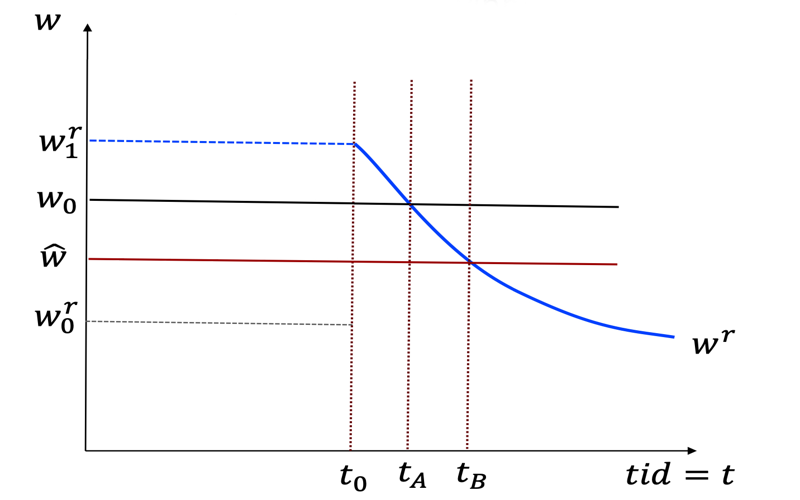

In [7]:
#bildes plassering
image_path = 'permisjon.jpg'

#åpner bilde
image = Image.open(image_path)

new_size = (800, 500) #bildestrl

#lagrer resized bilde
resized_image = image.resize(new_size)

#displayer bilde
display(resized_image)

Figuren viser sammenheng mellom lønnen kvinner mottar for arbeid, og når hun velger å gå tilbake i arbeid. Kvinnen har lønnen $w_0$ før hun får barn, og får permisjon ved fødsel $t_0$. Reservasjonslønnen etter fødsel er representert ved $w_1^r$, og er høyere en lønnen hun har ved fødsel. Ved permisjon får hun beholde jobben og velger dermed å returnere til arbeid ved tidspunkt $t_A$. Hvis kvinnen ikke fikk permisjon, måtte hun si opp jobben, og må konkurere om ny jobb. Hun får dermed lavere lønn $\hat{w}$, og velger å returnere til arbeid senere, altså ved $t_B$, da reservasjonslønnen hennes blir lavere ettersom barnet blir eldre. Igjen tyder dette på at gode permisjonsordninger ved fødsel bidrar til høyere yrkesdeltakelse blant kvinner grunnet at kvinnen velger å returnere tidligere til arbeid enn ved uten permisjonsordninger.

## Høy yrkesdeltakelse blant kvinner og høye barnetall: 
#### Hvorfor er dette viktig for den norske velferdsmodellens bærekraft?

Den norske velferdsmodellen er i hovedsak finansiert gjennom ulike skatteordninger, blant annet inntektskatt. At kvinner deltar i arbeidsstyrken medfører økte inntektskatter, som benyttes til å finansiere velferdsgodene. I tillegg utgjør kvinner en stor andel av den totale arbeidsstyrken, så kvinnenes deltakelse vil medføre mer økonomisk vekst og produktivitet, som igjen medfører økte skatteinntekter som igjen finansierer de norske velferdsgodene. 

Høye barnetall, altså antall barn per kvinne, er viktig for å sikre fremtiden for velferdstaten. Dette for å sikre tilstrekkelig arbeidskraft for fremtiden, og dermed unngår mangel på arbeidskraft. Desto flere barn som blir født, desto flere vil komme i arbeid i fremtiden, noe som vil være viktig spesielt i ett land med en eldrende befolkning. I tillegg gjør det landet mindre avhengig av importert arbeidskraft. 

Da Norge har en aldrende befolkning, er både høy yrkesdeltakelse blant kvinner og høye barnetall viktig for å kunne opprettholde dagens velferdsordninger. Uten kvinners yrkesdeltakelse og barnefødsler, vil man ikke kunne opprettholde dagens velferdsordninger, som er kjernen i den norske velferdstaten.

## Kort oppsummert

I oppgaven har man gått gjennom potensielt hvorfor menn og kvinner velger ulik arbeidstid. Videre har man også sett på hvordan permisjonsgoder kan påvirke yrkesdeltakelse blant kvinner. Å tilslutt så man på hvorfor høy yrkesdeltakelse blant kvinner og høye barnetall er viktig for den norske velferdsmodellen.

# Oppgave 1.2

I oppgave 1.2 skal man se på sammenheng mellom helseforbruk per innbygger og egenandeler. Her skal man se på data fra forskjellige EU land (data fra 2019, Eurostat), samt se på hvordan en økt egenandel ville påvirket bruken av helsetjenester. 

## Sammenheng mellom helseforbruk og egenandel

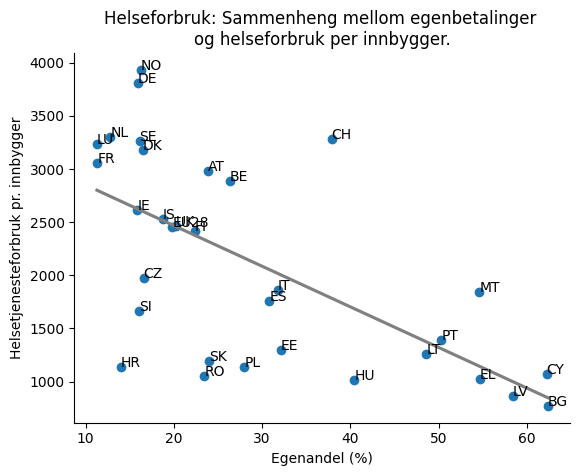

In [8]:
#laster in data
health = pd.read_csv("https://raw.githubusercontent.com/jan127/SOK-2008/main/Utfordringer/Utfordring_1/estat_hlth_sha11_hf_filtered_en-3.csv")

#wide df
wide_df = health.pivot(index='geo', columns='icha11_hf', values="OBS_VALUE")

#reset index på datasett
wide_df = wide_df.reset_index()
wide_df["percentage"] = wide_df["HF3"]/wide_df["HF1"] * 100

fig = create_ax()
plt.scatter(wide_df["percentage"], wide_df["HF1"])

#legger til navn på dotsene
for i, geo_label in enumerate(wide_df["geo"]):
    plt.annotate(geo_label, (wide_df["percentage"][i], wide_df["HF1"][i]))

sns.regplot(x=wide_df["percentage"], y=wide_df["HF1"], scatter=False, color='gray', ci=None)

#x and y lab
plt.ylabel("Helsetjenesteforbruk pr. innbygger")
plt.xlabel("Egenandel (%)")
plt.title("""Helseforbruk: Sammenheng mellom egenbetalinger 
og helseforbruk per innbygger.""")
plt.show()

På figuren ovenfor ser man sammehengen mellom egenandel for helsetjenester og helseforbruk pr innbygger. I blant annet de skandinaviske landene ser man et generelt høyt forbuk og en lav egenandel på bruk av helsetjenester. Utifra figuren kan man se en generell negativ korrelasjon mellom helsetjeneseforbruk pr innbygger og prosentvis egenandel. Dette vil si at helseforbruket per innbygger blir mindre ved økt egenandel og høyere ved reduksjon av egenandel.

## Hva skjer ved en økning av egenandelen?

Figuren nedenfor viser hvordan markedet for helsetjenester fungerer i dag. Prisen markert $P_0$ viser hvor mye samfunnet må betale for helsetjenestene konsumentene benytter. Prisen markert $0.15P_1$ viser prisen konsumentene må betale (egenandel). Helseforsikring fører til en økt bruk av helsetjenester fra $M_0$ til $M_2$. Uten egenandel ville konsumentene benyttet $M_1$ helsetjenester, altså enda mere. I figuren medfører egenandelen et dødvektstap. (at marginalnytten av helsetjenestene er lavere enn marginalkostnadene.) Dette vil si ett inneffektivt bruk av samfunnets ressurser.

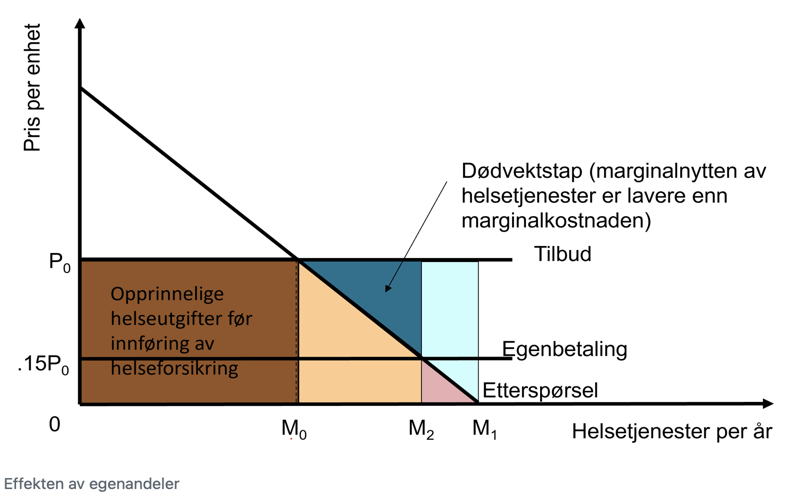

In [9]:
#bildes plassering
image_path3 = 'egenandel.jpg'

new_size = (800, 500) #bildestrl

#åpner bilde
image3 = Image.open(image_path3)

#lagrer resized bilde
resized_image3 = image3.resize(new_size)

#displayer bilde
display(resized_image3)

Ved uelastisk etterspørsel, vil lav egenandel og høy forsikringsdekning være gunstig. Dette grunnet at konsumentene er lite prisfølsom ovenfor godet. Dersom etterspørselen er elastisk vil det være optimalt med egenandeler, da full forsikring vil medføre høy etterspørsel.

Ser man på fordelingseffekten derimot kan det være en ulempe å øke egenandelen. Ofte er det de med lavere inntekt som har høyest behov for helsetjenestene, og dermed kan en økning i egenandelen medføre at disse får problemer med å betale for tjenestene. I tillegg vil ikke en økning i egenandel påvirke den delen av befolkningen med høyest betalingsvillighet i stor grad. 

# Appendix

ChatGPT. (2023, 15. september.) https://chat.openai.com/share/601880fb-c7b2-4e9b-99bf-28bf82d03bef

ChatGPT. (2023, 18. september.) https://chat.openai.com/share/f3f5ecc6-e9d7-4f57-8cab-9cd8f9c66c3b